## corona dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set()

## 1. Load Data

In [2]:
data=pd.read_csv("corona_tested.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_10408\90614493.py:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("corona_tested.csv")


In [3]:
data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [4]:
data.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [5]:
data.info()## one int col,10 object columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [6]:
data.isnull().sum() # no null value is present 

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [7]:
data.shape 

(278848, 11)

In [8]:
 #normalization value counts
data.Corona.value_counts(normalize=True)

negative    0.933222
positive    0.052821
other       0.013957
Name: Corona, dtype: float64

In [9]:
data.describe()

,Ind_ID
count,278848.000000
mean,139424.500000
std,80496.628269
min,1.000000
25%,69712.750000
50%,139424.500000
75%,209136.250000
max,278848.000000


<Axes: >

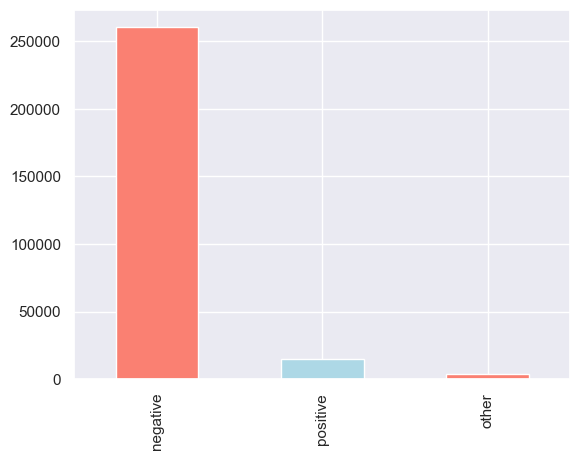

In [10]:
data.Corona.value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [11]:
data.duplicated().sum() ## there is no duplicate in the dataset

0

C:\Users\HP\AppData\Local\Temp\ipykernel_10408\3378899743.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,linewidth=0.2)


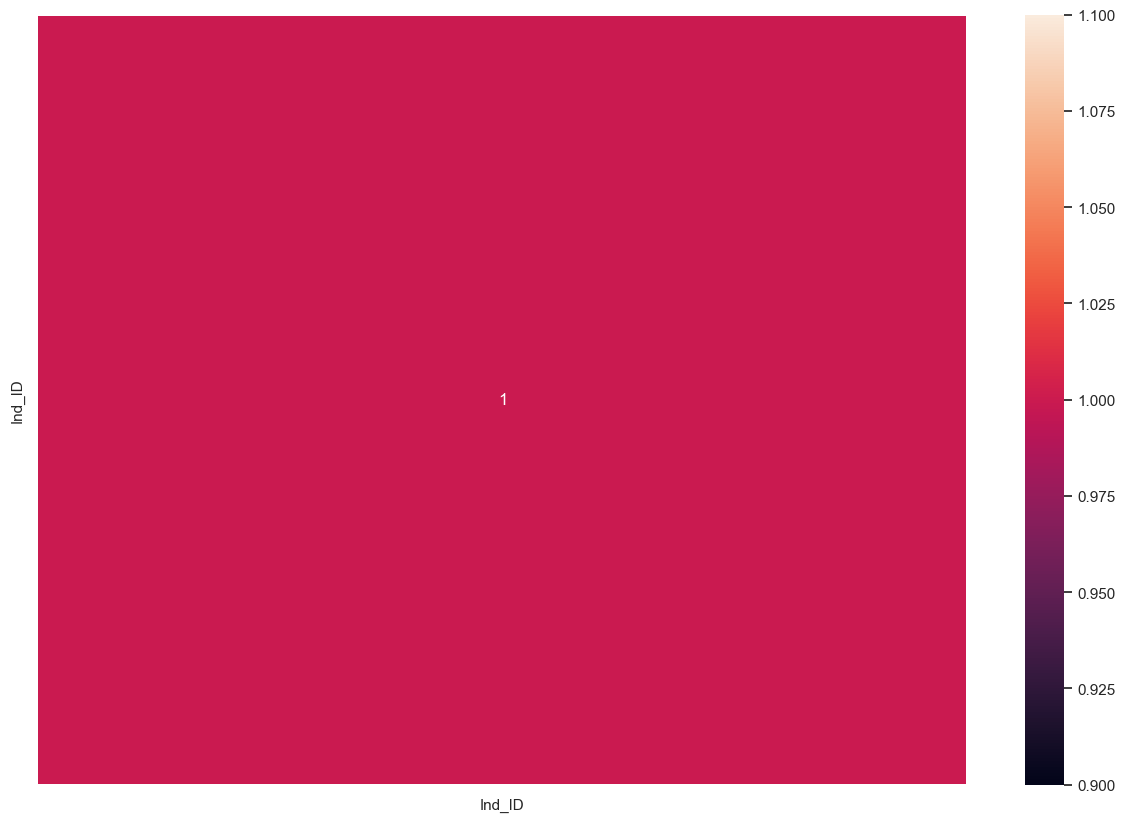

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(),annot=True,linewidth=0.2)
plt.show() # there is no correlation between any other columns

## Visiualization

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [14]:
data["Test_date"].unique().sum()

'11-03-202012-03-202013-03-202014-03-202015-03-202016-03-202017-03-202018-03-202019-03-202020-03-202021-03-202022-03-202023-03-202024-03-202025-03-202026-03-202027-03-202028-03-202029-03-202030-03-202031-03-202001-04-202002-04-202003-04-202004-04-202005-04-202006-04-202007-04-202008-04-202009-04-202010-04-202011-04-202012-04-202013-04-202014-04-202015-04-202016-04-202017-04-202018-04-202019-04-202020-04-202021-04-202022-04-202023-04-202024-04-202025-04-202026-04-202027-04-202028-04-202029-04-202030-04-2020'

### 1.Test_date vs Corona

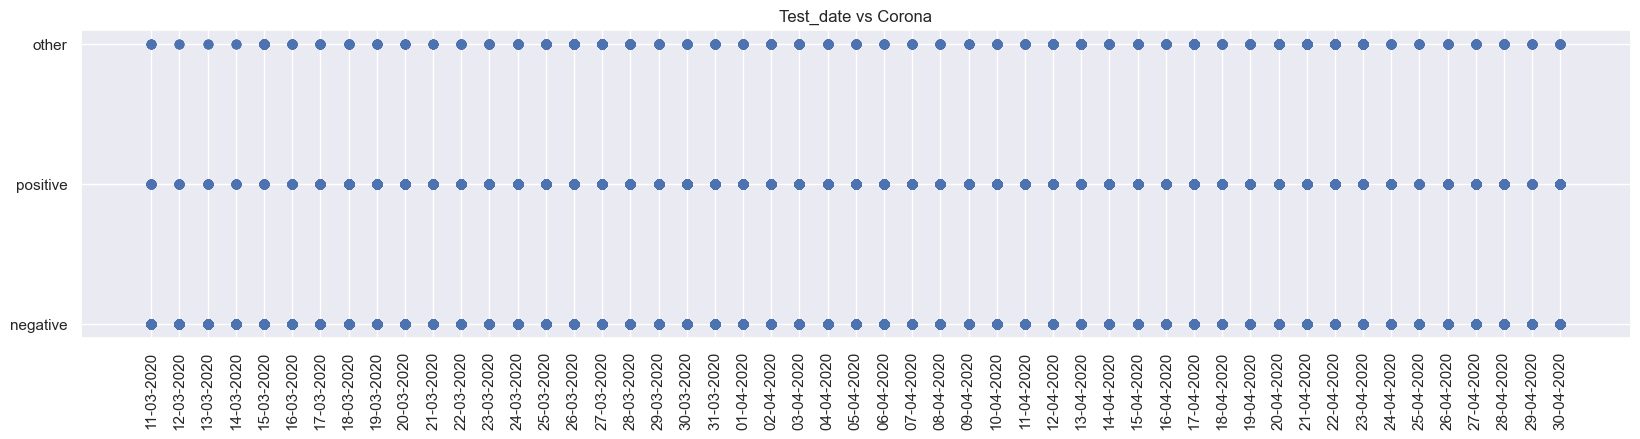

In [15]:
plt.figure(figsize=(20,4))
plt.scatter(x = 'Test_date', y = 'Corona', data = data)
plt.title("Test_date vs Corona")
plt.xticks(rotation=90)
plt.show()

### 2.cough_symptoms vs Known_contact

In [16]:
data["Cough_symptoms"].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TRUE'),
  Text(1, 0, 'FALSE'),
  Text(2, 0, 'None'),
  Text(3, 0, 'False'),
  Text(4, 0, 'True')])

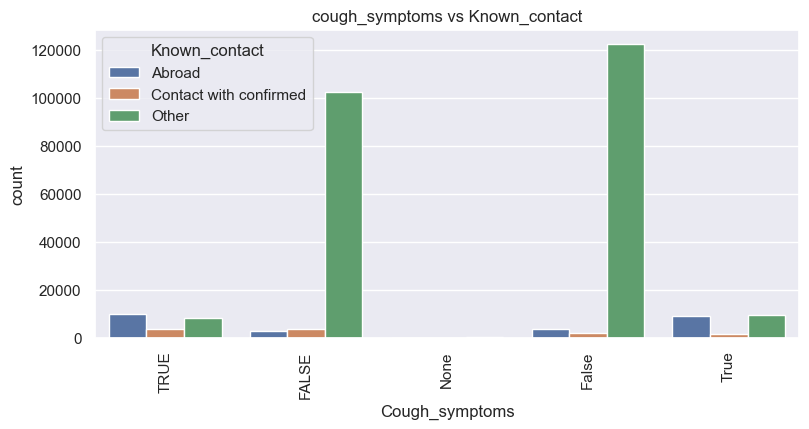

In [17]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=data["Cough_symptoms"],hue=data['Known_contact'], data = data)
plt.title("cough_symptoms vs Known_contact")
plt.xticks(rotation=90)

### 3.Fever vs Known_contact

In [18]:
data["Fever"].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'FALSE'),
  Text(1, 0, 'TRUE'),
  Text(2, 0, 'None'),
  Text(3, 0, 'False'),
  Text(4, 0, 'True')])

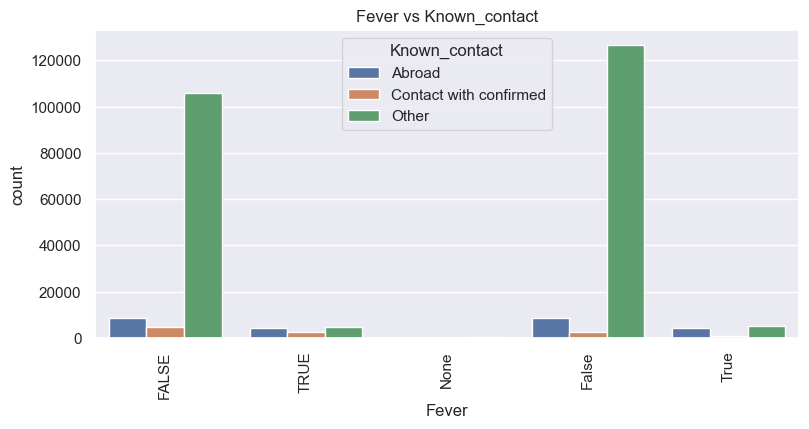

In [19]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=data["Fever"],hue=data['Known_contact'], data = data)
plt.title("Fever vs Known_contact")
plt.xticks(rotation=90)

### 4.Sore_throat vs Known_contact

In [20]:
data["Sore_throat"].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'TRUE'),
  Text(1, 0, 'FALSE'),
  Text(2, 0, 'None'),
  Text(3, 0, 'False'),
  Text(4, 0, 'True')])

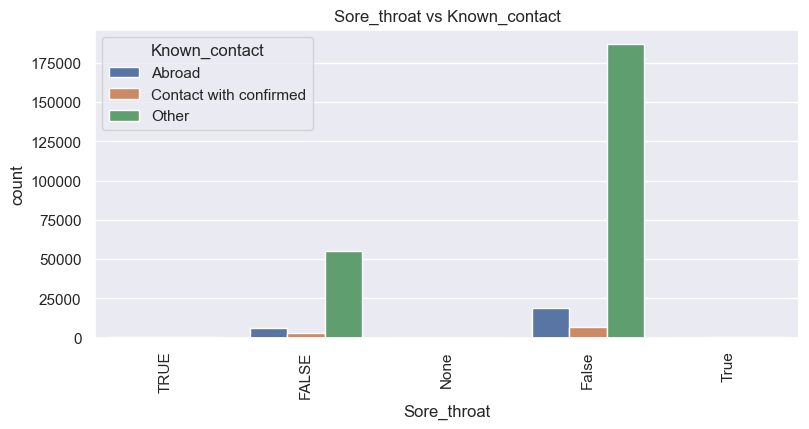

In [21]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=data["Sore_throat"],hue=data['Known_contact'], data = data)
plt.title("Sore_throat vs Known_contact")
plt.xticks(rotation=90)

In [22]:
### 5.Shortness_of_breath vs Known_contact

In [23]:
data["Shortness_of_breath"].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'FALSE'),
  Text(1, 0, 'TRUE'),
  Text(2, 0, 'None'),
  Text(3, 0, 'False'),
  Text(4, 0, 'True')])

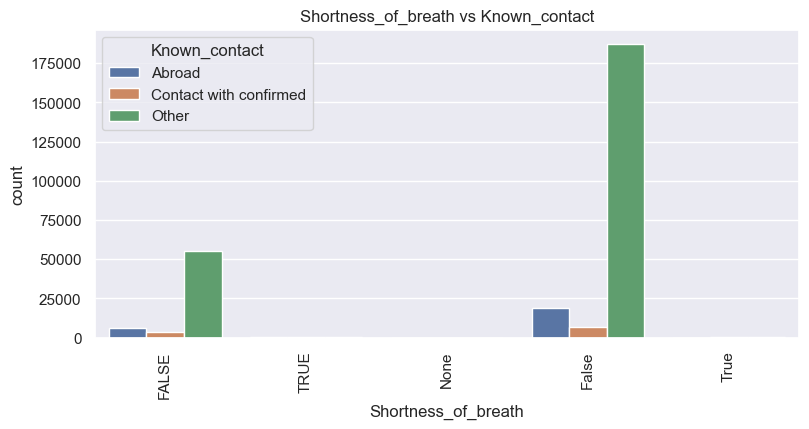

In [24]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=data["Shortness_of_breath"],hue=data['Known_contact'], data = data)
plt.title("Shortness_of_breath vs Known_contact")
plt.xticks(rotation=90)

### 6.Headache vs Know_contact

In [25]:
data["Headache"].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'FALSE'),
  Text(1, 0, 'TRUE'),
  Text(2, 0, 'None'),
  Text(3, 0, 'False'),
  Text(4, 0, 'True')])

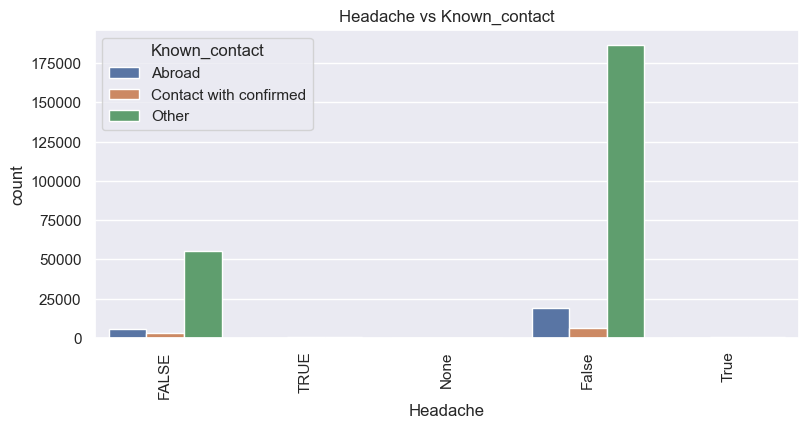

In [26]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=data["Headache"],hue=data['Known_contact'], data = data)
plt.title("Headache vs Known_contact")
plt.xticks(rotation=90)

### 7.Corona vs Known_contact 

In [27]:
data["Corona"].unique()

array(['negative', 'positive', 'other'], dtype=object)

(array([0, 1, 2]),
 [Text(0, 0, 'negative'), Text(1, 0, 'positive'), Text(2, 0, 'other')])

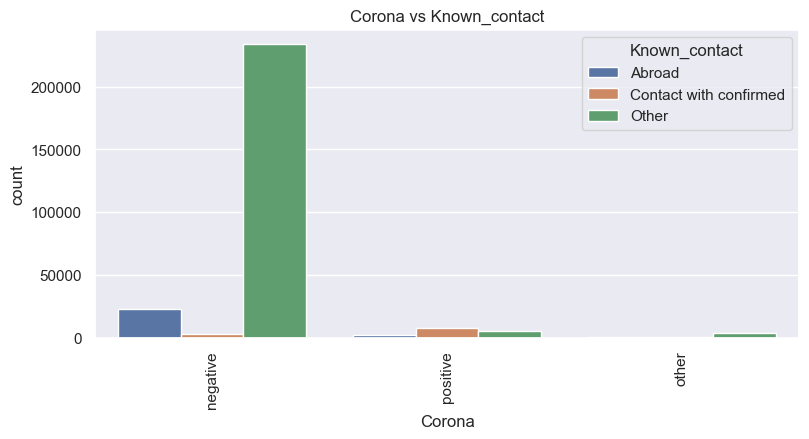

In [28]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=data["Corona"],hue=data['Known_contact'], data = data)
plt.title("Corona vs Known_contact")
plt.xticks(rotation=90)

In [29]:
### 8.sex vs Corona

In [30]:
data["Sex"].unique()

array(['None', 'male', 'female'], dtype=object)

(array([0, 1, 2]),
 [Text(0, 0, 'None'), Text(1, 0, 'male'), Text(2, 0, 'female')])

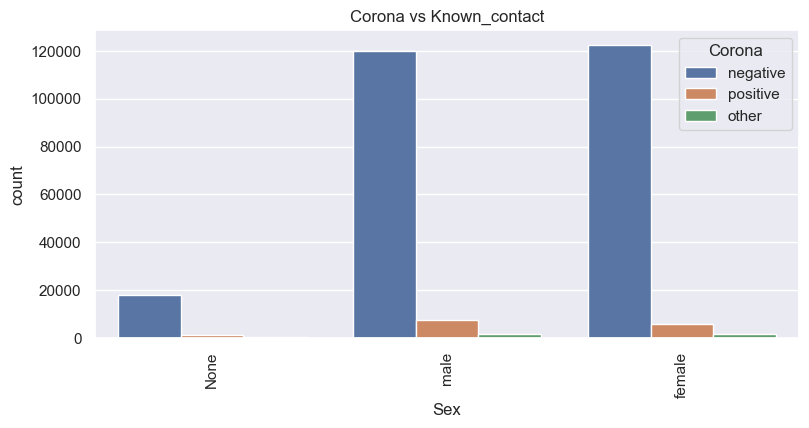

In [31]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=data["Sex"],hue=data['Corona'], data = data)
plt.title("Corona vs Known_contact")
plt.xticks(rotation=90)

### Detect of oulier

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


<Axes: >

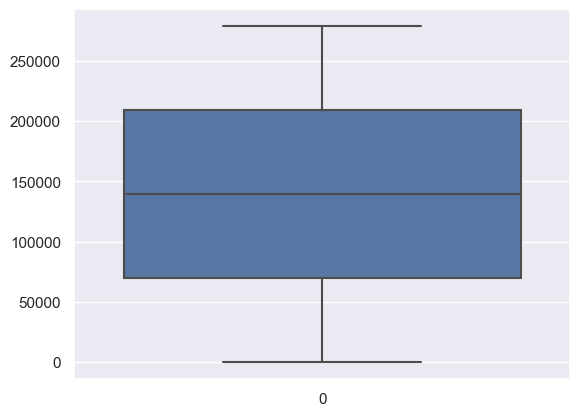

In [33]:
sns.boxplot(data["Ind_ID"])## no oulier in Ind_ID

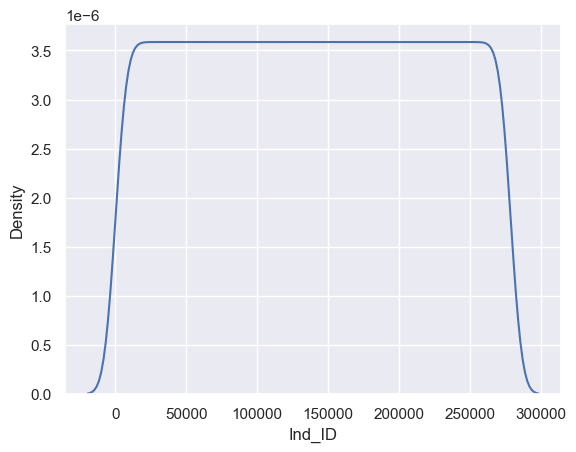

In [34]:
sns.kdeplot(data["Ind_ID"])
plt.show()

There is no outlier in the above dataset so there no need of performing outlier Treatment

## Feature Engineering

In [35]:
from scipy import stats

In [36]:
data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


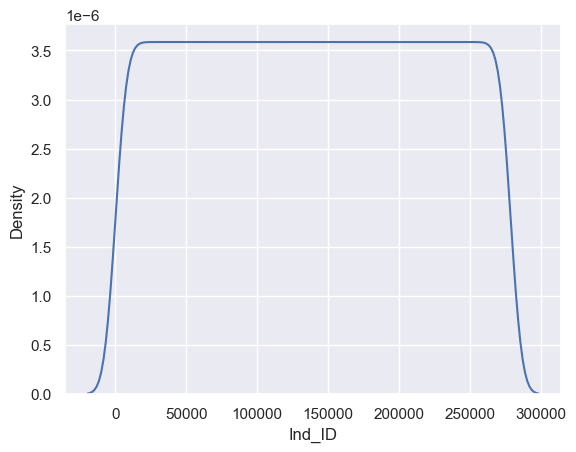

In [37]:
sns.kdeplot(data["Ind_ID"])
plt.show()

There is only one column whose need of feature engineering because this table contain only one numerical data and rest other col is categorical.

## Feature Encoding Techniques(Dealing with Categorical Variables)

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

In [39]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


### There is 10 col is there who needs to be encoded

In [41]:
data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [42]:
# 1. get dummies-Cough_symptoms(5),Fever(5),Sore_throat(5),Headache(5),Shortness_of_breath(5),Age_60_above(3),Sex(3),Known_contact(3)
# 2. Corona(3)

In [43]:
data["Age_60_above"].unique()

array(['None', 'No', 'Yes'], dtype=object)

In [44]:
df_dum =pd.get_dummies(data['Cough_symptoms'],drop_first = True)

data=pd.concat([data,df_dum],axis=1)
data.drop(columns=["Cough_symptoms"],inplace=True)
data

,Ind_ID,Test_date,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,True,FALSE,None,TRUE
0,1,11-03-2020,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad,0,0,0,1
1,2,11-03-2020,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad,0,1,0,0
2,3,11-03-2020,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad,0,1,0,0
3,4,11-03-2020,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad,0,0,0,1
4,5,11-03-2020,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,positive,None,male,Other,0,0,0,0
278844,278845,30-04-2020,False,False,False,False,negative,None,female,Other,0,0,0,0
278845,278846,30-04-2020,False,False,False,False,negative,None,male,Other,0,0,0,0
278846,278847,30-04-2020,False,False,False,False,negative,None,male,Other,0,0,0,0


In [110]:
df_dum =pd.get_dummies(data['Fever'],drop_first = True)

data=pd.concat([data,df_dum],axis=1)
data.drop(columns=["Fever"],inplace=True)
data

,Ind_ID,Test_date,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,True,FALSE,None,TRUE,True,FALSE,None,TRUE
0,1,11-03-2020,TRUE,FALSE,FALSE,negative,None,None,Abroad,0,0,0,1,0,1,0,0
1,2,11-03-2020,FALSE,FALSE,FALSE,positive,None,None,Abroad,0,1,0,0,0,0,0,1
2,3,11-03-2020,FALSE,FALSE,FALSE,positive,None,None,Abroad,0,1,0,0,0,0,0,1
3,4,11-03-2020,FALSE,FALSE,FALSE,negative,None,None,Abroad,0,0,0,1,0,1,0,0
4,5,11-03-2020,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,positive,None,male,Other,0,0,0,0,0,0,0,0
278844,278845,30-04-2020,False,False,False,negative,None,female,Other,0,0,0,0,0,0,0,0
278845,278846,30-04-2020,False,False,False,negative,None,male,Other,0,0,0,0,0,0,0,0
278846,278847,30-04-2020,False,False,False,negative,None,male,Other,0,0,0,0,0,0,0,0


In [111]:
df_dum =pd.get_dummies(data['Sore_throat'],drop_first = True)

data=pd.concat([data,df_dum],axis=1)
data.drop(columns=["Sore_throat"],inplace=True)
data

,Ind_ID,Test_date,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,True,FALSE,None,TRUE,True,FALSE,None,TRUE,True,FALSE,None,TRUE
0,1,11-03-2020,FALSE,FALSE,negative,None,None,Abroad,0,0,0,1,0,1,0,0,0,0,0,1
1,2,11-03-2020,FALSE,FALSE,positive,None,None,Abroad,0,1,0,0,0,0,0,1,0,1,0,0
2,3,11-03-2020,FALSE,FALSE,positive,None,None,Abroad,0,1,0,0,0,0,0,1,0,1,0,0
3,4,11-03-2020,FALSE,FALSE,negative,None,None,Abroad,0,0,0,1,0,1,0,0,0,1,0,0
4,5,11-03-2020,FALSE,FALSE,negative,None,None,Contact with confirmed,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,positive,None,male,Other,0,0,0,0,0,0,0,0,0,0,0,0
278844,278845,30-04-2020,False,False,negative,None,female,Other,0,0,0,0,0,0,0,0,0,0,0,0
278845,278846,30-04-2020,False,False,negative,None,male,Other,0,0,0,0,0,0,0,0,0,0,0,0
278846,278847,30-04-2020,False,False,negative,None,male,Other,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
df_dum =pd.get_dummies(data['Headache'],drop_first = True)

data=pd.concat([data,df_dum],axis=1)
data.drop(columns=["Headache"],inplace=True)
data

,Ind_ID,Test_date,Shortness_of_breath,Corona,Age_60_above,Sex,Known_contact,True,FALSE,None,...,None,TRUE,True,FALSE,None,TRUE,True,FALSE,None,TRUE
0,1,11-03-2020,FALSE,negative,None,None,Abroad,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2,11-03-2020,FALSE,positive,None,None,Abroad,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,3,11-03-2020,FALSE,positive,None,None,Abroad,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,4,11-03-2020,FALSE,negative,None,None,Abroad,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,11-03-2020,FALSE,negative,None,None,Contact with confirmed,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,positive,None,male,Other,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278844,278845,30-04-2020,False,negative,None,female,Other,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278845,278846,30-04-2020,False,negative,None,male,Other,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278846,278847,30-04-2020,False,negative,None,male,Other,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
df_dum =pd.get_dummies(data['Shortness_of_breath'],drop_first = True)

data=pd.concat([data,df_dum],axis=1)
data.drop(columns=["Shortness_of_breath"],inplace=True)
data

,Ind_ID,Test_date,Corona,Age_60_above,Sex,Known_contact,True,FALSE,None,TRUE,...,None,TRUE,True,FALSE,None,TRUE,True,FALSE,None,TRUE
0,1,11-03-2020,negative,None,None,Abroad,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,2,11-03-2020,positive,None,None,Abroad,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,3,11-03-2020,positive,None,None,Abroad,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,4,11-03-2020,negative,None,None,Abroad,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,5,11-03-2020,negative,None,None,Contact with confirmed,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,positive,None,male,Other,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278844,278845,30-04-2020,negative,None,female,Other,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278845,278846,30-04-2020,negative,None,male,Other,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278846,278847,30-04-2020,negative,None,male,Other,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
df_dum =pd.get_dummies(data['Age_60_above'],drop_first = True)

data=pd.concat([data,df_dum],axis=1)
data.drop(columns=["Age_60_above"],inplace=True)
data

,Ind_ID,Test_date,Corona,Sex,Known_contact,True,FALSE,None,TRUE,True,...,True,FALSE,None,TRUE,True,FALSE,None,TRUE,None,Yes
0,1,11-03-2020,negative,None,Abroad,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,2,11-03-2020,positive,None,Abroad,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,3,11-03-2020,positive,None,Abroad,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,4,11-03-2020,negative,None,Abroad,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,5,11-03-2020,negative,None,Contact with confirmed,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,positive,male,Other,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
278844,278845,30-04-2020,negative,female,Other,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
278845,278846,30-04-2020,negative,male,Other,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
278846,278847,30-04-2020,negative,male,Other,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [115]:
df_dum =pd.get_dummies(data['Sex'],drop_first = True)

data=pd.concat([data,df_dum],axis=1)
data.drop(columns=["Sex"],inplace=True)
data

,Ind_ID,Test_date,Corona,Known_contact,True,FALSE,None,TRUE,True,FALSE,...,None,TRUE,True,FALSE,None,TRUE,None,Yes,female,male
0,1,11-03-2020,negative,Abroad,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
1,2,11-03-2020,positive,Abroad,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,3,11-03-2020,positive,Abroad,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,4,11-03-2020,negative,Abroad,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
4,5,11-03-2020,negative,Contact with confirmed,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,positive,Other,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
278844,278845,30-04-2020,negative,Other,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
278845,278846,30-04-2020,negative,Other,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
278846,278847,30-04-2020,negative,Other,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [116]:
df_dum =pd.get_dummies(data['Known_contact'],drop_first = True)

data=pd.concat([data,df_dum],axis=1)
data.drop(columns=["Known_contact"],inplace=True)
data

,Ind_ID,Test_date,Corona,True,FALSE,None,TRUE,True,FALSE,None,...,True,FALSE,None,TRUE,None,Yes,female,male,Contact with confirmed,Other
0,1,11-03-2020,negative,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,2,11-03-2020,positive,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,3,11-03-2020,positive,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,4,11-03-2020,negative,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,5,11-03-2020,negative,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,positive,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
278844,278845,30-04-2020,negative,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
278845,278846,30-04-2020,negative,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
278846,278847,30-04-2020,negative,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [118]:
## label encoding for col corona
LE = LabelEncoder()

In [119]:
data["Corona"]=LE.fit_transform(data["Corona"])

In [52]:
data.info() # after performing encoding technique the col is increases to 27

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Ind_ID                  278848 non-null  int64 
 1   Test_date               278848 non-null  object
 2   Shortness_of_breath     278848 non-null  object
 3   Corona                  278848 non-null  int32 
 4   True                    278848 non-null  uint8 
 5   FALSE                   278848 non-null  uint8 
 6   None                    278848 non-null  uint8 
 7   TRUE                    278848 non-null  uint8 
 8   True                    278848 non-null  uint8 
 9   FALSE                   278848 non-null  uint8 
 10  None                    278848 non-null  uint8 
 11  TRUE                    278848 non-null  uint8 
 12  True                    278848 non-null  uint8 
 13  FALSE                   278848 non-null  uint8 
 14  None                    278848 non-n

In [120]:
## after doing encoding i converted it into other dataset so that i can avoid confusion
data.to_csv("data_new.csv",index=False)

In [121]:
data_new=pd.read_csv("data_new.csv")

In [122]:
data_new.head()

,Ind_ID,Test_date,Corona,True,FALSE,None,TRUE,True.1,FALSE.1,None.1,...,True.4,FALSE.4,None.4,TRUE.4,None.5,Yes,female,male,Contact with confirmed,Other
0,1,11-03-2020,0,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,2,11-03-2020,2,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,3,11-03-2020,2,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,4,11-03-2020,0,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,5,11-03-2020,0,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0


## Feature Selection

### 1. Variance Threshold
feature selector that remove all low-variance feature this feature selection algortm looks only at the independent variable,not to ouput variable used for unsupervised

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [132]:
X=data_new.drop(labels=['Corona',"Test_date"], axis=1)
y=data_new['Corona']

In [133]:
X

,Ind_ID,True,FALSE,None,TRUE,True.1,FALSE.1,None.1,TRUE.1,True.2,...,True.4,FALSE.4,None.4,TRUE.4,None.5,Yes,female,male,Contact with confirmed,Other
0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,2,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2,3,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,4,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,5,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
278844,278845,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
278845,278846,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
278846,278847,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [124]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Ind_ID                  278848 non-null  int64
 1   True                    278848 non-null  int64
 2   FALSE                   278848 non-null  int64
 3   None                    278848 non-null  int64
 4   TRUE                    278848 non-null  int64
 5   True.1                  278848 non-null  int64
 6   FALSE.1                 278848 non-null  int64
 7   None.1                  278848 non-null  int64
 8   TRUE.1                  278848 non-null  int64
 9   True.2                  278848 non-null  int64
 10  FALSE.2                 278848 non-null  int64
 11  None.2                  278848 non-null  int64
 12  TRUE.2                  278848 non-null  int64
 13  True.3                  278848 non-null  int64
 14  FALSE.3                 278848 non-null  int64
 15  

In [134]:
y

0         0
1         2
2         2
3         0
4         0
         ..
278843    2
278844    0
278845    0
278846    0
278847    0
Name: Corona, Length: 278848, dtype: int64

In [138]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data_new.drop(labels=['Corona',"Test_date"], axis=1),
    data_new['Corona'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((195193, 27), (83655, 27))

In [128]:
## Lets apply the variance threshold

In [139]:
## zero variance feature
## to avoid overfitting we can split the dataset into train and test data
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

VarianceThreshold(threshold=0)

In [140]:
X_train

,Ind_ID,True,FALSE,None,TRUE,True.1,FALSE.1,None.1,TRUE.1,True.2,...,True.4,FALSE.4,None.4,TRUE.4,None.5,Yes,female,male,Contact with confirmed,Other
121355,121356,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
90813,90814,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
253125,253126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
222761,222762,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
8668,8669,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,211544,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
86293,86294,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
122579,122580,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
152315,152316,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [142]:
X_test

,Ind_ID,True,FALSE,None,TRUE,True.1,FALSE.1,None.1,TRUE.1,True.2,...,True.4,FALSE.4,None.4,TRUE.4,None.5,Yes,female,male,Contact with confirmed,Other
229115,229116,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
181871,181872,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
219603,219604,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
138213,138214,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
207510,207511,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94453,94454,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
187221,187222,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
19630,19631,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
67222,67223,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [145]:
y_train

121355    2
90813     0
253125    0
222761    0
8668      0
         ..
211543    0
86293     0
122579    2
152315    0
117952    0
Name: Corona, Length: 195193, dtype: int64

In [147]:
y_test

229115    0
181871    0
219603    0
138213    0
207510    0
         ..
94453     0
187221    0
19630     0
67222     0
219617    0
Name: Corona, Length: 83655, dtype: int64

In [148]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [150]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [151]:
### Finding non constant features
sum(var_thres.get_support())

27

In [152]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [153]:
for column in constant_columns:
    print(column)

In [155]:
X_train.shape, X_test.shape 

((195193, 27), (83655, 27))

## Feature Selection- With Correlation
In this step we will be removing the features which are highly correlated

In [158]:
X_train.corr()

,Ind_ID,True,FALSE,None,TRUE,True.1,FALSE.1,None.1,TRUE.1,True.2,...,True.4,FALSE.4,None.4,TRUE.4,None.5,Yes,female,male,Contact with confirmed,Other
Ind_ID,1.000000,0.173547,-0.751843,-0.021242,-0.238122,0.127029,-0.795774,-0.021234,-0.185681,-0.023999,...,-0.018555,-0.725495,-0.003903,-0.092365,0.802611,-0.203378,0.090430,0.075804,-0.086293,0.083396
True,0.173547,1.000000,-0.224514,-0.008409,-0.082043,0.473214,-0.242232,-0.008409,-0.058786,-0.000950,...,0.001943,-0.154041,-0.000635,-0.017917,0.153018,-0.053505,-0.007374,0.036939,0.055751,-0.337612
FALSE,-0.751843,-0.224514,1.000000,-0.023959,-0.233767,-0.154814,0.877082,-0.023959,-0.044788,-0.007414,...,-0.011274,0.530936,-0.001810,-0.003468,-0.682166,0.162852,-0.063843,-0.035531,-0.025213,0.166915
None,-0.021242,-0.008409,-0.023959,1.000000,-0.008755,-0.005798,-0.025850,0.994281,-0.005420,-0.001538,...,-0.001229,-0.010351,0.075559,0.003473,-0.026440,0.009434,0.001527,-0.000396,0.001145,0.005953
TRUE,-0.238122,-0.082043,-0.233767,-0.008755,1.000000,-0.056573,0.113403,-0.008120,0.494138,0.094250,...,0.082771,0.120022,-0.000662,0.131590,-0.242322,0.042976,-0.026232,0.009163,0.206362,-0.422075
True.1,0.127029,0.473214,-0.154814,-0.005798,-0.056573,1.000000,-0.167032,-0.005798,-0.040536,0.001863,...,0.008819,-0.106219,-0.000438,-0.012355,0.113777,-0.036759,-0.008855,0.029688,0.039813,-0.216034
FALSE.1,-0.795774,-0.242232,0.877082,-0.025850,0.113403,-0.167032,1.000000,-0.025850,-0.180718,0.004661,...,-0.005310,0.544906,-0.001953,0.007162,-0.735080,0.161642,-0.062609,-0.036074,0.006745,0.047609
None.1,-0.021234,-0.008409,-0.023959,0.994281,-0.008120,-0.005798,-0.025850,1.000000,-0.006273,-0.001538,...,-0.001229,-0.010351,0.075559,0.003473,-0.026440,0.009434,0.001870,-0.000739,0.001145,0.005953
TRUE.1,-0.185681,-0.058786,-0.044788,-0.005420,0.494138,-0.040536,-0.180718,-0.006273,1.000000,0.096984,...,0.096774,0.108558,-0.000474,0.150529,-0.171542,0.055116,-0.036126,0.014898,0.199046,-0.278051
True.2,-0.023999,-0.000950,-0.007414,-0.001538,0.094250,0.001863,0.004661,-0.001538,0.096984,1.000000,...,0.205557,-0.028170,-0.000116,-0.003277,-0.043459,0.006188,0.011221,-0.004193,0.122059,-0.069570


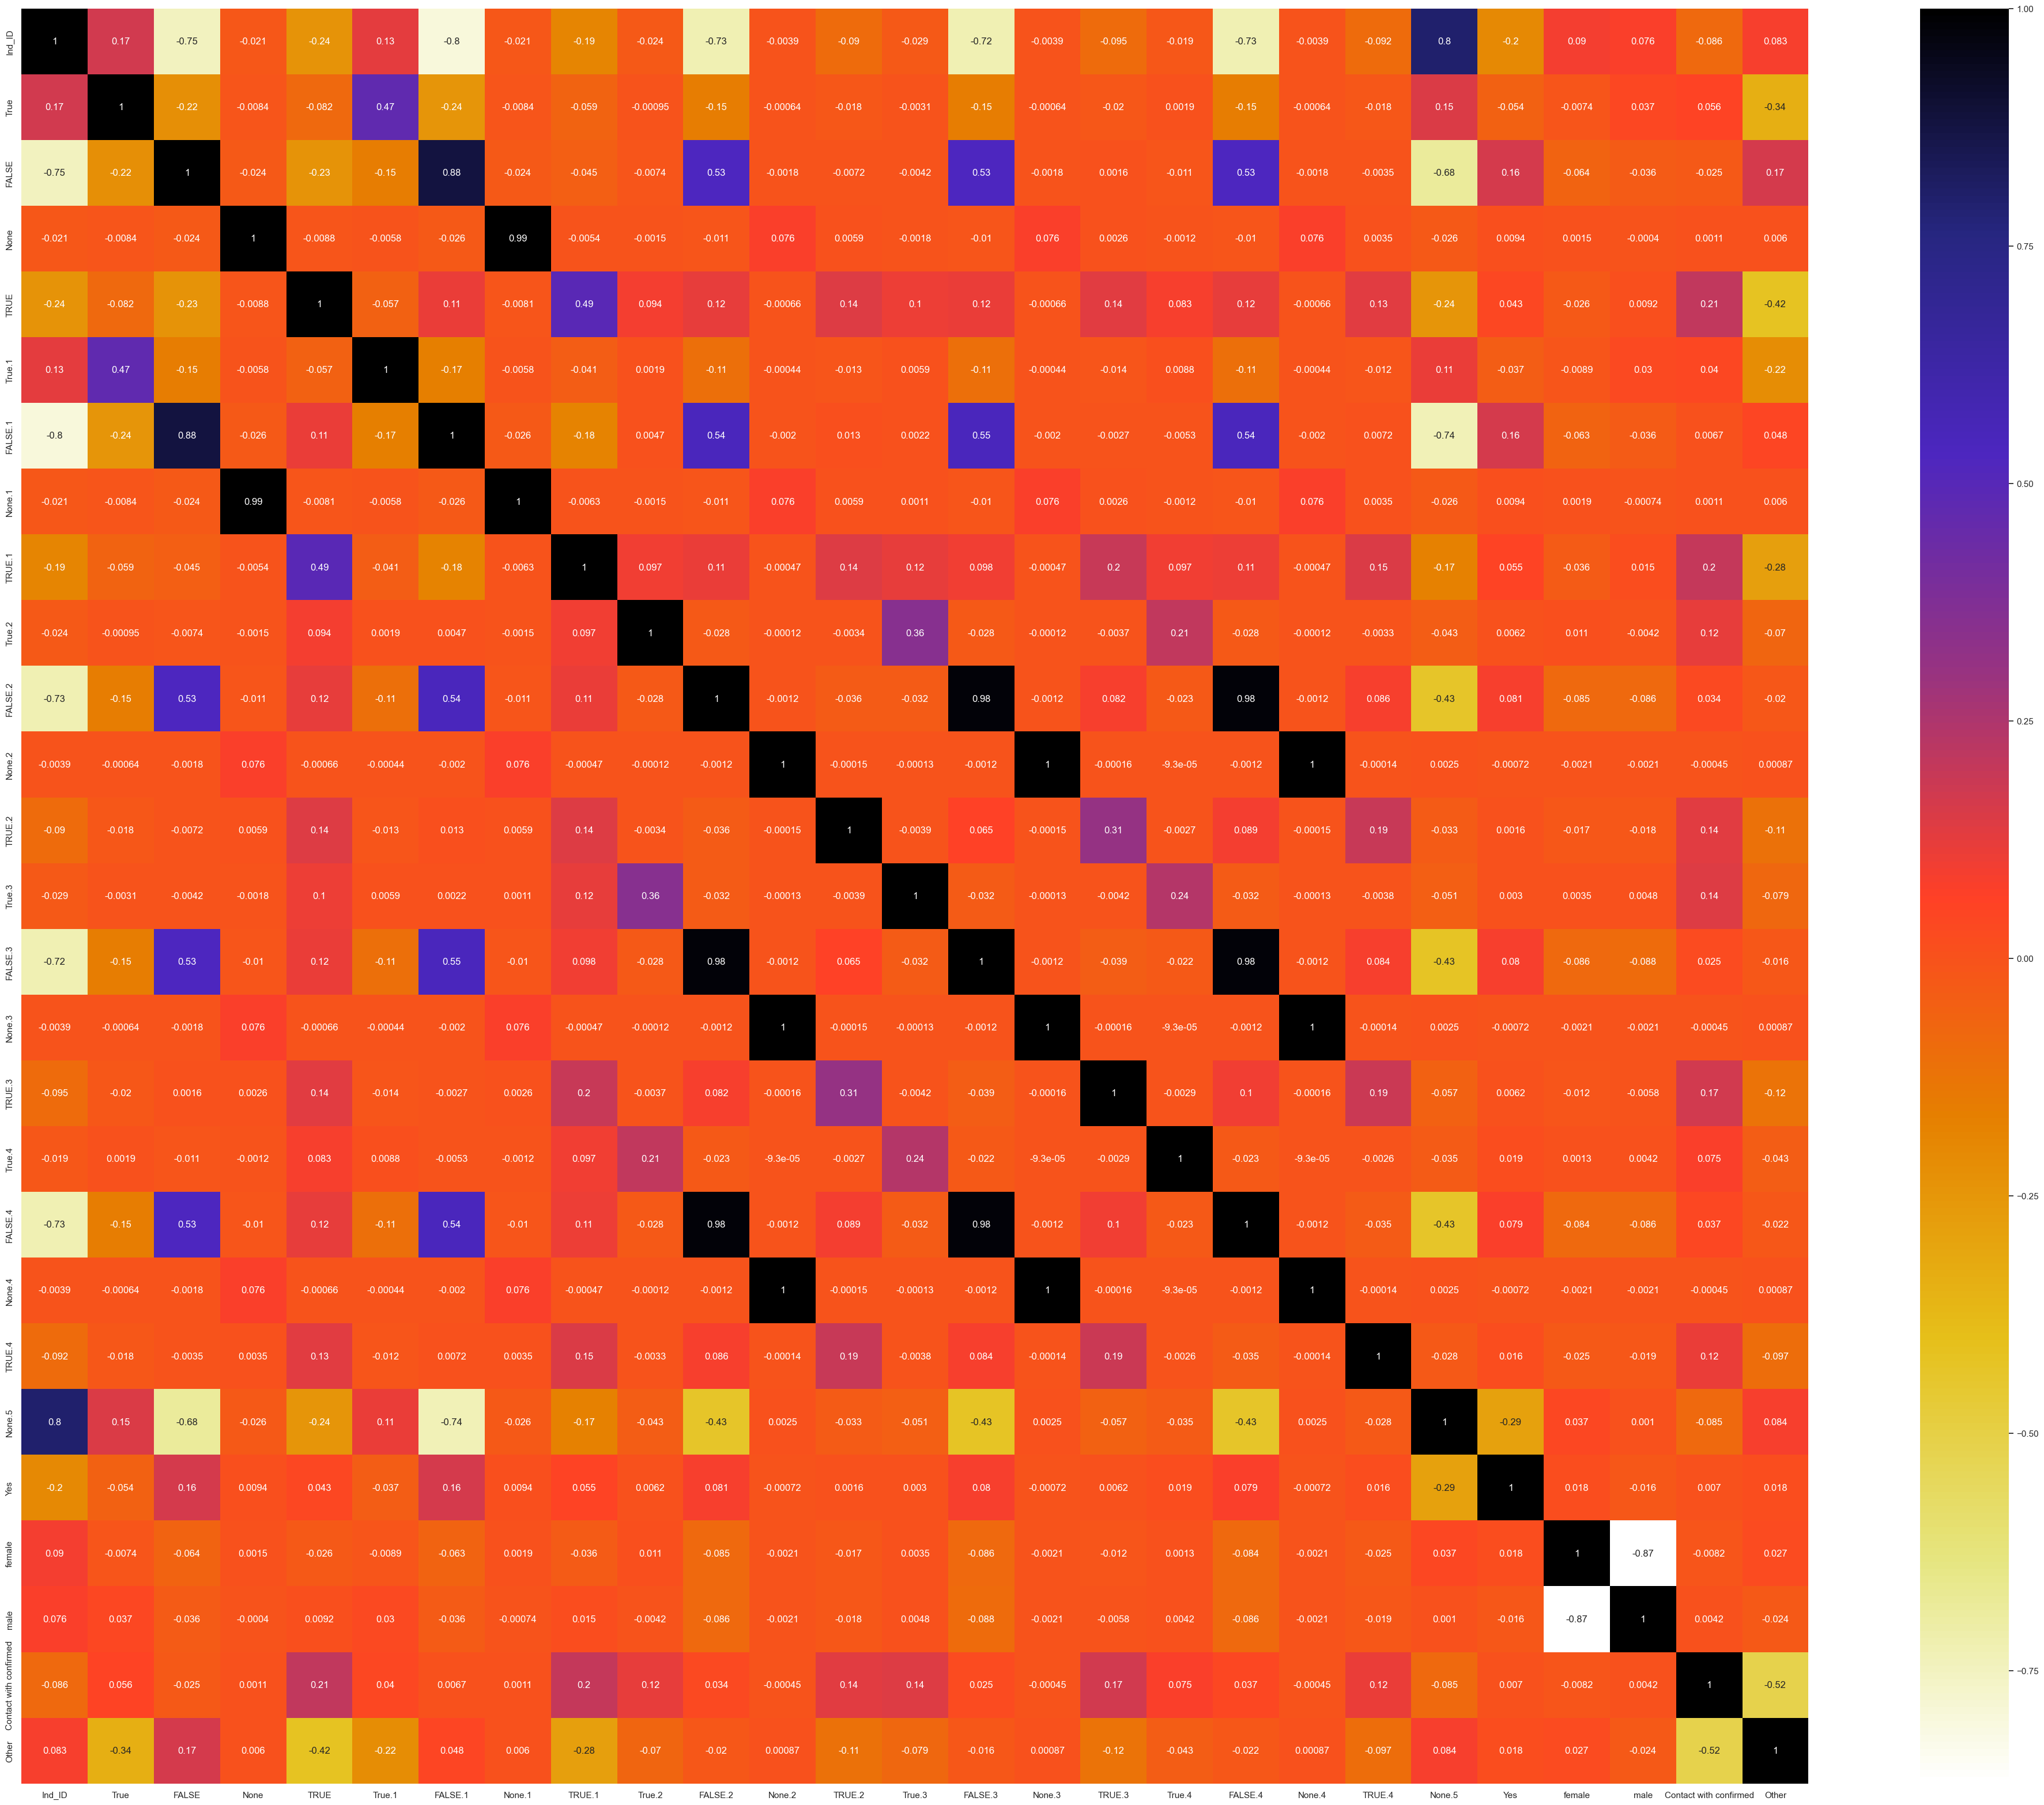

In [159]:
#Using Pearson Correlation
plt.figure(figsize=(50,40))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [160]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [161]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

5

In [162]:
corr_features 

{'FALSE.3', 'FALSE.4', 'None.1', 'None.3', 'None.4'}

In [165]:
X_train.shape, X_test.shape ### (195193, 27), (83655, 27) to (195193, 22), (83655, 22)

((195193, 22), (83655, 22))

## Feature Selection-Information gain - mutual information In Classification Problem Statements

In [167]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([1.76204616e-02, 4.00900492e-05, 1.37595299e-02, 3.02794689e-05,
       1.70376519e-02, 1.14072399e-03, 1.55176237e-02, 2.47986037e-02,
       6.23672658e-03, 5.10939682e-03, 0.00000000e+00, 6.89954014e-03,
       9.24079227e-03, 1.31050449e-02, 2.97249353e-03, 6.13940900e-03,
       2.59929909e-02, 2.14630295e-03, 1.87232795e-02, 1.84827589e-02,
       6.16750228e-02, 7.69365390e-02])

In [168]:
## The data get sorted into descending order 
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Other                     0.076937
Contact with confirmed    0.061675
None.5                    0.025993
TRUE.1                    0.024799
female                    0.018723
male                      0.018483
Ind_ID                    0.017620
TRUE                      0.017038
FALSE.1                   0.015518
FALSE                     0.013760
TRUE.3                    0.013105
True.3                    0.009241
TRUE.2                    0.006900
True.2                    0.006237
TRUE.4                    0.006139
FALSE.2                   0.005109
True.4                    0.002972
Yes                       0.002146
True.1                    0.001141
True                      0.000040
None                      0.000030
None.2                    0.000000
dtype: float64

<Axes: >

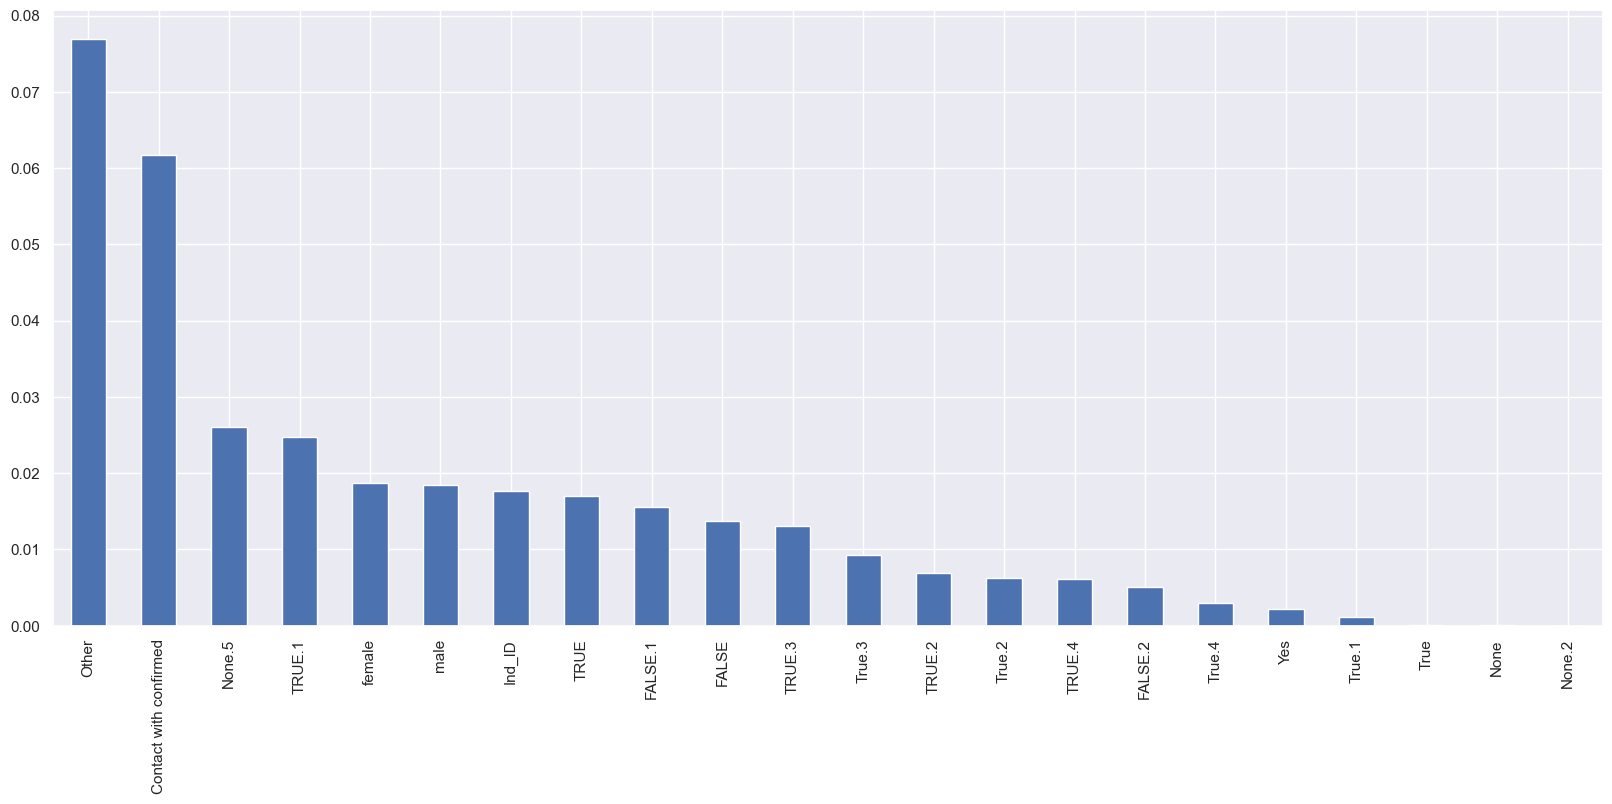

In [169]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [170]:
## Observation: The information is high for others and least for none 2

In [173]:
## from selectkbest we can select the best mutual information 
from sklearn.feature_selection import SelectKBest

In [175]:
#Now we Will select the  top 20 important features
# i did not select the feature EDUCATION--0.003444,HR staff--0.003426 ,secretaries--0.001773 and laborers--0
sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Ind_ID', 'True', 'FALSE', 'TRUE', 'True.1', 'FALSE.1', 'TRUE.1',
       'True.2', 'FALSE.2', 'TRUE.2', 'True.3', 'TRUE.3', 'True.4', 'TRUE.4',
       'None.5', 'Yes', 'female', 'male', 'Contact with confirmed', 'Other'],
      dtype='object')

In [176]:
X_train

,Ind_ID,True,FALSE,None,TRUE,True.1,FALSE.1,TRUE.1,True.2,FALSE.2,...,True.3,TRUE.3,True.4,TRUE.4,None.5,Yes,female,male,Contact with confirmed,Other
121355,121356,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
90813,90814,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
253125,253126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
222761,222762,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
8668,8669,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,211544,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
86293,86294,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
122579,122580,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
152315,152316,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Feature Scaling

In [178]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.22421496, -0.28070593, -0.79982021, ..., -0.92991128,
         5.00604441, -2.59147608],
       [-0.60351828, -0.28070593,  1.25028099, ..., -0.92991128,
        -0.19975852,  0.38588047],
       [ 1.41224622, -0.28070593, -0.79982021, ..., -0.92991128,
        -0.19975852,  0.38588047],
       ...,
       [-0.20901402, -0.28070593,  1.25028099, ...,  1.0753714 ,
        -0.19975852,  0.38588047],
       [ 0.16027952, -0.28070593, -0.79982021, ..., -0.92991128,
        -0.19975852,  0.38588047],
       [-0.26647707, -0.28070593,  1.25028099, ...,  1.0753714 ,
        -0.19975852,  0.38588047]])

In [180]:
X_test=sc.transform(X_test)
X_test

array([[ 2.29116000e+05,  1.00000000e+00, -4.81235237e-17, ...,
         1.00000000e+00, -7.86284503e-18, -2.27148856e-17],
       [ 1.81872000e+05,  2.40253598e-18, -4.81235237e-17, ...,
         1.00000000e+00, -7.86284503e-18,  1.00000000e+00],
       [ 2.19604000e+05,  2.40253598e-18, -4.81235237e-17, ...,
         1.00000000e+00, -7.86284503e-18,  1.00000000e+00],
       ...,
       [ 1.96310000e+04,  2.40253598e-18,  1.00000000e+00, ...,
         1.00000000e+00, -7.86284503e-18,  1.00000000e+00],
       [ 6.72230000e+04,  2.40253598e-18,  1.00000000e+00, ...,
        -1.40366345e-16, -7.86284503e-18,  1.00000000e+00],
       [ 2.19618000e+05,  2.40253598e-18, -4.81235237e-17, ...,
        -1.40366345e-16, -7.86284503e-18,  1.00000000e+00]])

In [181]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                   feature        VIF
0                   Ind_ID  24.018494
1                     True   1.537719
2                    FALSE        inf
3                     None        inf
4                     TRUE        inf
5                   True.1   1.347044
6                  FALSE.1        inf
7                   None.1        inf
8                   TRUE.1        inf
9                   True.2   1.176771
10                 FALSE.2        inf
11                  None.2        inf
12                  TRUE.2        inf
13                  True.3   1.205547
14                 FALSE.3        inf
15                  None.3        inf
16                  TRUE.3        inf
17                  True.4   1.087563
18                 FALSE.4        inf
19                  None.4        inf
20                  TRUE.4        inf
21                  None.5   7.594537
22                     Yes   1.208562
23                  female   8.206253
24                    male   8.247298
25  Contact 

In [ ]:
The default VIF(Variance Inflation Factor) cutoff value is 5; only variables with a VIF less than 5 will be included in the model.
However, note that many sources say that a VIF of less than 10 is acceptable.

## so there i'm going to consider 10 as a acceptable.

# Machine learning method

In [183]:
## 1.Linear Regression

In [187]:
# importing cost function libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import math
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

In [188]:
# fitting linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)
# regression coefficients
print('Coefficients: ', lm.coef_)

Coefficients:  [-0.00879455  0.00188569 -0.10151181  0.00298122 -0.06116644  0.01079718
  0.08117992  0.09973091  0.03190052  0.0086015   0.00421421  0.0289711
  0.04947382  0.06039935  0.02932898  0.02862582 -0.01688785  0.01312919
  0.00398499  0.01289339  0.2033444  -0.00943114]


In [189]:
lm.intercept_ ## B0 value

0.11904115413974888

In [191]:
# fitting model into test data
y_pred = lm.predict(X_train)
y_pred

array([1.0908414 , 0.02657143, 0.01892364, ..., 0.04096836, 0.05584811,
       0.04147372])

In [193]:
# calculting rsquared value
r2 = r2_score(y_true=y_train,y_pred=y_pred)
print(r2)

0.404789354544388


In [194]:
## accuracy is very less.

In [196]:
# calculting adjusted rsquared value
N=X.shape[0]
p=5
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.4047786816427904


In [198]:
# Checking mean value for residuala
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 2.730154523062175e-19


In [200]:
import seaborn as sns

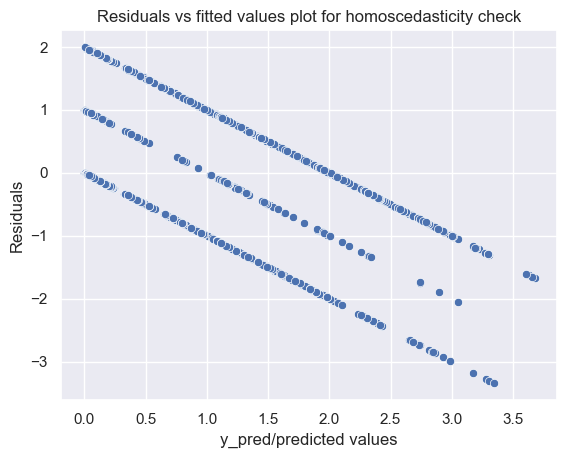

In [202]:
# scatter plot between predicted value and error
p = sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
#p = sns.lineplot([0,2.6],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

C:\Users\HP\AppData\Local\Temp\ipykernel_10132\531944841.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred),bins=50)


<Axes: xlabel='Corona', ylabel='Density'>

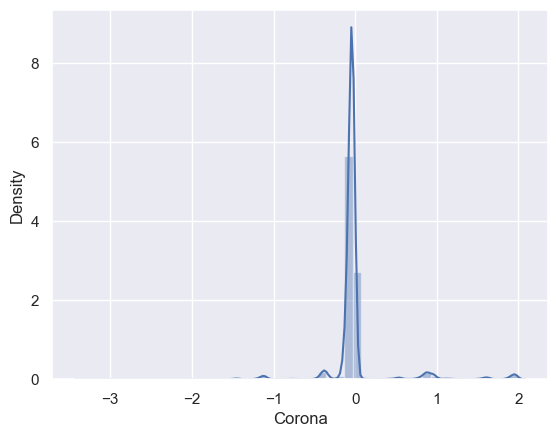

In [205]:
# checking if errors are normally distributed are not
sns.distplot((y_train-y_pred),bins=50)

In [207]:
predictions = lm.predict(X_test) # predicting test set

In [209]:
predictions

array([-2014.8550637 , -1599.37668543, -1931.21262598, ...,
        -172.53502761,  -591.10273582, -1931.34465807])

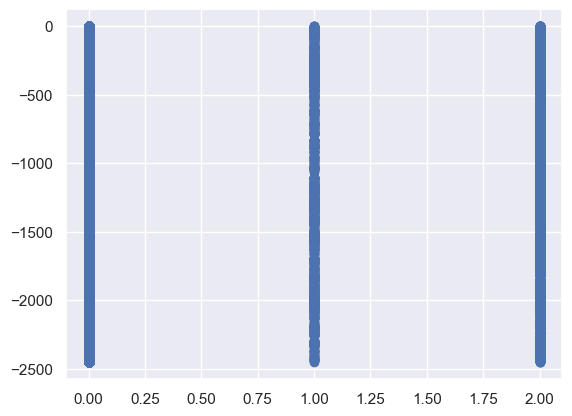

In [211]:
# scatter plot between actaul and predicted value
plt.scatter(y_test,predictions)

In [213]:
# Calculating error
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1226.474796471708
MSE: 2004620.6002796264
RMSE: 1415.8462488136297


In [215]:
## 2.Random forest regression

In [217]:
# Importing library
from sklearn.ensemble import RandomForestRegressor

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [218]:
# performing prediction
y_pred = regressor.predict(X_test)
y_pred

array([1.34, 1.34, 1.34, ..., 1.34, 0.22, 0.22])

### Hyperparameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV,\
RandomizedSearchCV
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

In [ ]:
##Now we will update the parameters of the model by those which are obtained by using GridSearchCV.
model_grid = RandomForestClassifier(max_depth=9,
                                    max_features="log2",
                                    max_leaf_nodes=9,
                                    n_estimators=25)
model_grid.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

In [ ]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

In [ ]:
model_random = RandomForestClassifier(max_depth=3,
                                      max_features='log2',
                                      max_leaf_nodes=6,
                                      n_estimators=100)
model_random.fit(X_train, y_train)
y_pred_rand = model.predict(X_test)
print(classification_report(y_pred_rand, y_test))

In [ ]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
## MAS>MSE<RMSE is less